In [1]:
import os
import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset split
output_base_path_aksaraka = r'D:\Proyek Aksara 2\Datasets_split_aksaraka'

# Memuat DenseNet121 sebagai model dasar (tanpa lapisan klasifikasi)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense untuk klasifikasi
predictions = Dense(28, activation='softmax')(x)  

# Menggabungkan model dasar DenseNet dengan lapisan klasifikasi yang baru
model = Model(inputs=base_model.input, outputs=predictions)

# Menyatakan bahwa lapisan dasar DenseNet tidak akan dilatih
for layer in base_model.layers:
    layer.trainable = False

# Compile model dengan optimizer Adam dan loss function categorical crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 32, 32,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 32, 32,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 32, 32,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 32, 32,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 32, 32,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 32, 32,    │     12,288 │ conv2_block2_0_r

 Total params: 7,066,204 (26.96 MB)

 Trainable params: 28,700 (112.11 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [2]:
# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksaraka, 'train')
test_dir = os.path.join(output_base_path_aksaraka, 'test')

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 3898 images belonging to 28 classes.
Found 1691 images belonging to 28 classes.


In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/40


c:\Users\p\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 898s 7s/step - accuracy: 0.1881 - loss: 3.0282 - val_accuracy: 0.5760 - val_loss: 1.5621
Epoch 2/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.5741 - loss: 1.6177 - val_accuracy: 0.7428 - val_loss: 1.0195
Epoch 3/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.7173 - loss: 1.1441 - val_accuracy: 0.8226 - val_loss: 0.7618
Epoch 4/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.7739 - loss: 0.9160 - val_accuracy: 0.8740 - val_loss: 0.6072
Epoch 5/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.8105 - loss: 0.7924 - val_accuracy: 0.8699 - val_loss: 0.5365
Epoch 6/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 430s 3s/step - accuracy: 0.8187 - loss: 0.6911 - val_accuracy: 0.8882 - val_loss: 0.4766
Epoch 7/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.8277 - loss: 0.6589 - val_accuracy: 0.8989 - val_loss: 0.4314
Epoch 8/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 437s 3s/step - accuracy: 0.8586 - loss: 0.5813 - val_accuracy: 0.912

In [4]:
final_accuracy = history.history['val_accuracy'][-1]
print(f'Akurasi akhir model: {final_accuracy}')


Akurasi akhir model: 0.9586043953895569


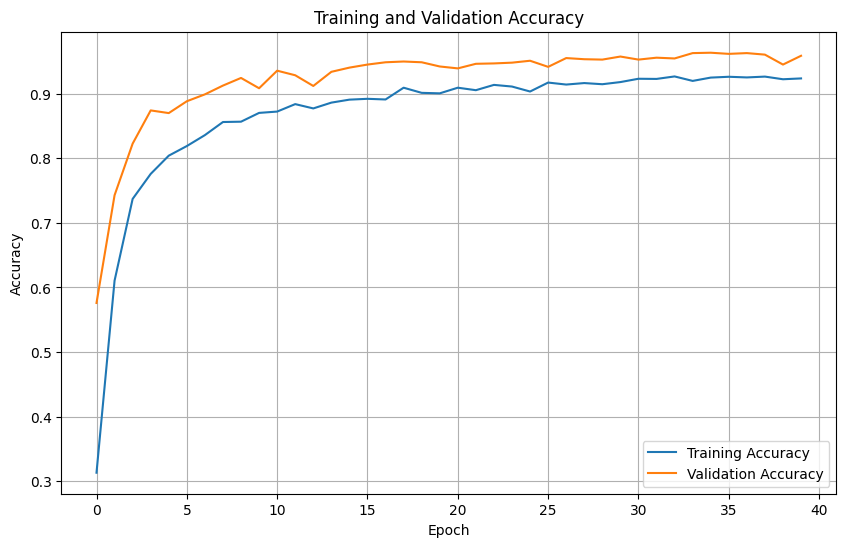

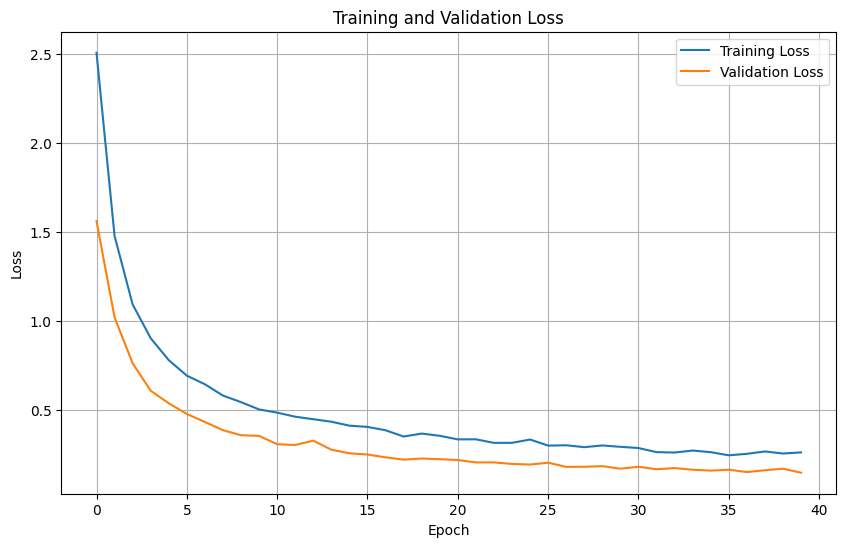

In [5]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Save the model
model.save('aksaraKawiDenseNet_classifier_model.h5')


In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Load the model
model = load_model('D:\\Proyek Aksara 2\\Model Aksaraka\\aksaraKawiDenseNet_classifier_model.h5')

# Class labels
class_labels = [
    'ba', 'bha', 'ca', 'cha', 'da', 'dha', 'ga', 'gha', 'ha', 'ja', 'jha', 'ka', 'kha',
    'la', 'ma', 'na', 'pha', 'ra', 'sa', 'ta', 'tha', 'ña', 'śa', 'ḍa', 'ṅa', 'ṇa', 'ṣa', 'ṭa'
]

# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debug: Print raw predictions
    predicted_class_idx = np.argmax(predictions)
    print(f"Predicted class index: {predicted_class_idx}")  # Debug: Print predicted class index
    predicted_class = class_labels[predicted_class_idx]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        print(f"Uploaded file: {uploaded_file}")  # Debug: Print uploaded file information
        content = uploaded_file['content']  # Access the content directly
        
        try:
            # Convert content to image array
            img = load_img(io.BytesIO(content), target_size=(128, 128))
            img_array = img_to_array(img)
            
            # Classify the uploaded image
            predicted_class = classify_image(img_array)
            
            # Display the uploaded image and classification result
            display_img = Image(value=content, format='png', width=300, height=300)
            result_label = Label(f'Classified as: {predicted_class}')
            display(VBox([display_img, result_label]))
        
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))
